# **PLQY_all**

_by Felix Eickemeyer_

Evaluation of all absolute PLQY data.

In [1]:
import os

import pandas as pd
import thot
from thot import ThotProject
from importlib import reload

from FTE_analysis_libraries import General as gen
from FTE_analysis_libraries import PLQY as lqy
from FTE_analysis_libraries import Spectrum as spc

In [2]:
# Initializes Thot project
db = ThotProject(dev_root=r'PLQY_results')

In [3]:
samples = db.find_assets({'type': 'absolute PL spectrum'})
sample_strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))
for idx, sample in enumerate(samples):
    A = sample.metadata["A"]
    PLQY = sample.metadata["PLQY"]
    s_name = samples[idx].name.split('_absolute')[0]
    print(f'{idx:2}: {s_name.ljust(sample_strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}')

 0: pero_3CA               : A = 7.7e-01, PLQY = 5.3e-02
 1: pero_3DA               : A = 7.8e-01, PLQY = 3.2e-02
 2: pero_C20_2KJ           : A = 8.0e-01, PLQY = 5.9e-02
 3: pero_C20_3GA           : A = 8.0e-01, PLQY = 5.4e-02
 4: pero_C20_OAI_1FA       : A = 8.1e-01, PLQY = 5.1e-02
 5: pero_C20_OAI_1KH       : A = 8.2e-01, PLQY = 4.9e-02
 6: pero_C20_OAI_1KI       : A = 7.9e-01, PLQY = 4.3e-02
 7: pero_C20_OAI_spiro_1IE : A = 8.3e-01, PLQY = 4.8e-02
 8: pero_C20_OAI_spiro_1IG : A = 8.1e-01, PLQY = 8.1e-02
 9: pero_C20_OAI_spiro_1JG : A = 8.1e-01, PLQY = 8.7e-02
10: pero_C20_OAI_spiro_1KD : A = 8.3e-01, PLQY = 6.8e-02
11: pero_C20_OAI_spiro_1KE : A = 8.3e-01, PLQY = 1.7e-02
12: pero_C20_OAI_spiro_1ME : A = 8.3e-01, PLQY = 9.0e-02
13: pero_C20_OAI_spiro_1MG : A = 8.1e-01, PLQY = 8.6e-02
14: pero_C20_OAI_spiro_1MI : A = 8.4e-01, PLQY = 3.0e-02
15: pero_C20_OAI_spiro_1OI : A = 8.1e-01, PLQY = 1.1e-01
16: pero_C20_rGO_1NH       : A = 8.1e-01, PLQY = 5.2e-02
17: pero_C20_rGO_2OE       : A 

In [4]:
#Select samples and change order
do_this_step = False

if do_this_step or ( not db.dev_mode() ):
    samples = db.find_assets({'type' : 'absolute PL spectrum'})
    #order = [i for i in range(6, 20)]
    order = [0]

    samples_new = [samples[order[idx]] for idx in range(len(order))]
    for idx, sample in enumerate(samples_new):
        print(f'{idx:2}: {sample.name}')
    do_this_step = False
else:
    samples_new = samples

In [5]:
samples = samples_new
def load_spectrum(asset):
    return spc.PEL_spectrum.load(os.path.dirname(asset.file), FN = os.path.basename(asset.file), take_quants_and_units_from_file = True)
sa = []
for idx, sample in enumerate(samples):
    sample.file = sample.file
    #sample.file = sample.file+'.csv' #only for Shuai samples, delete later
    sa.append(load_spectrum(sample))
    print(f'{idx:2}: {sample.name}')

 0: pero_3CA_absolute PL spectrum.csv
 1: pero_3DA_absolute PL spectrum.csv
 2: pero_C20_2KJ_absolute PL spectrum.csv
 3: pero_C20_3GA_absolute PL spectrum.csv
 4: pero_C20_OAI_1FA_absolute PL spectrum.csv
 5: pero_C20_OAI_1KH_absolute PL spectrum.csv
 6: pero_C20_OAI_1KI_absolute PL spectrum.csv
 7: pero_C20_OAI_spiro_1IE_absolute PL spectrum.csv
 8: pero_C20_OAI_spiro_1IG_absolute PL spectrum.csv
 9: pero_C20_OAI_spiro_1JG_absolute PL spectrum.csv
10: pero_C20_OAI_spiro_1KD_absolute PL spectrum.csv
11: pero_C20_OAI_spiro_1KE_absolute PL spectrum.csv
12: pero_C20_OAI_spiro_1ME_absolute PL spectrum.csv
13: pero_C20_OAI_spiro_1MG_absolute PL spectrum.csv
14: pero_C20_OAI_spiro_1MI_absolute PL spectrum.csv
15: pero_C20_OAI_spiro_1OI_absolute PL spectrum.csv
16: pero_C20_rGO_1NH_absolute PL spectrum.csv
17: pero_C20_rGO_2OE_absolute PL spectrum.csv
18: pero_C20_rGO_3EA_absolute PL spectrum.csv
19: pero_C20_rGO_spiro_1ID_absolute PL spectrum.csv
20: pero_C20_rGO_spiro_1JH_absolute PL spect

 0: pero_3CA               : A = 7.7e-01, PLQY = 5.3e-02, PF = 9.1e+19 1/(s m2)
 1: pero_3DA               : A = 7.8e-01, PLQY = 3.2e-02, PF = 5.5e+19 1/(s m2)
 2: pero_C20_2KJ           : A = 8.0e-01, PLQY = 5.9e-02, PF = 9.9e+19 1/(s m2)
 3: pero_C20_3GA           : A = 8.0e-01, PLQY = 5.4e-02, PF = 9.1e+19 1/(s m2)
 4: pero_C20_OAI_1FA       : A = 8.1e-01, PLQY = 5.1e-02, PF = 8.7e+19 1/(s m2)
 5: pero_C20_OAI_1KH       : A = 8.2e-01, PLQY = 4.9e-02, PF = 8.4e+19 1/(s m2)
 6: pero_C20_OAI_1KI       : A = 7.9e-01, PLQY = 4.3e-02, PF = 7.2e+19 1/(s m2)
 7: pero_C20_OAI_spiro_1IE : A = 8.3e-01, PLQY = 4.8e-02, PF = 8.1e+19 1/(s m2)
 8: pero_C20_OAI_spiro_1IG : A = 8.1e-01, PLQY = 8.1e-02, PF = 1.4e+20 1/(s m2)
 9: pero_C20_OAI_spiro_1JG : A = 8.1e-01, PLQY = 8.7e-02, PF = 1.5e+20 1/(s m2)
10: pero_C20_OAI_spiro_1KD : A = 8.3e-01, PLQY = 6.8e-02, PF = 1.2e+20 1/(s m2)
11: pero_C20_OAI_spiro_1KE : A = 8.3e-01, PLQY = 1.7e-02, PF = 2.9e+19 1/(s m2)
12: pero_C20_OAI_spiro_1ME : A = 8.3e-01

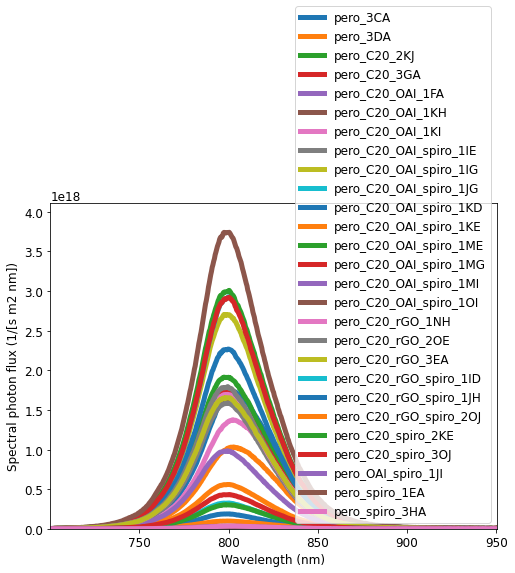

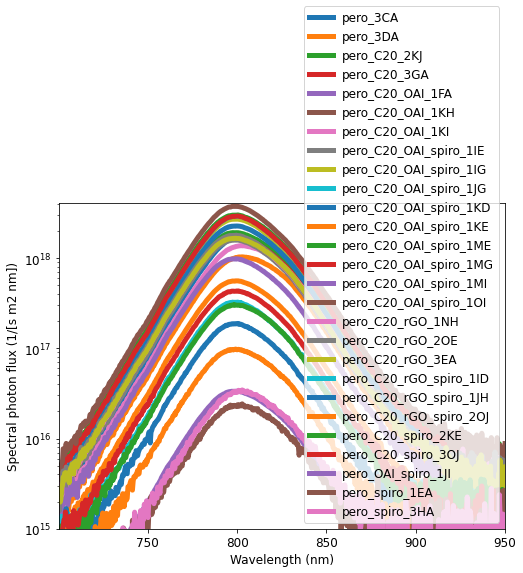

In [6]:
allPL = spc.PEL_spectra(sa)
allPL.names_to_label()

new_labels = []
sample_strlen = int(max([len(samples[idx].name.split('_absolute')[0]) for idx in range(len(samples))]))
for idx in range(len(samples)):
    allPL.sa[idx].plotstyle = dict(color = gen.colors[idx], linewidth = 5, linestyle = '-')
    sm = samples[idx].metadata
    A = sm['A']
    PLQY = sm['PLQY']
    s_name = samples[idx].name.split('_absolute')[0]
    new_labels.append(s_name)
    PF = allPL.sa[idx].photonflux(start = 700, stop = 900)
    print(f'{idx:2}: {s_name.ljust(sample_strlen+1)}: A = {A:.1e}, PLQY = {PLQY:.1e}, PF = {PF:.1e} 1/(s m2)')

if False:
    allPL.sa[0].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[1].plotstyle = dict(color = gen.colors[0], linewidth = 5, linestyle = '-')
    allPL.sa[2].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[3].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[4].plotstyle = dict(color = gen.colors[1], linewidth = 5, linestyle = '-')
    allPL.sa[5].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[6].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[7].plotstyle = dict(color = gen.colors[2], linewidth = 5, linestyle = '-')
    allPL.sa[8].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    allPL.sa[9].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')
    allPL.sa[10].plotstyle = dict(color = gen.colors[4], linewidth = 5, linestyle = '-')
    allPL.sa[11].plotstyle = dict(color = gen.colors[4], linewidth = 5, linestyle = '-')
    allPL.sa[12].plotstyle = dict(color = gen.colors[5], linewidth = 5, linestyle = '-')
    allPL.sa[13].plotstyle = dict(color = gen.colors[5], linewidth = 5, linestyle = '-')
    #allPL.sa[14].plotstyle = dict(color = gen.colors[3], linewidth = 5, linestyle = '-')

if False:
    colors = gen.colors
    #colors = gen.CSS_colors
    #col_names = gen.CSS_col_names ... color=colors[col_names[idx]]

    for idx, sp in enumerate(allPL.sa):
        if idx < 5:
            sp.plotstyle = dict(color=colors[0], linewidth = 5, linestyle = '-')
        elif idx < 10:
            sp.plotstyle = dict(color=colors[1], linewidth = 5, linestyle = '-')
        elif idx < 11:
            sp.plotstyle = dict(color=colors[2], linewidth = 5, linestyle = '-')
        elif idx < 15:
            sp.plotstyle = dict(color=colors[3], linewidth = 5, linestyle = '-')
        elif idx < 19:
            sp.plotstyle = dict(color=colors[4], linewidth = 5, linestyle = '-')

        else:
            sp.plotstyle = dict(color=colors[5], linewidth = 5, linestyle = '-')


#allPL.label(['s1', 's2', 's3', 's4', 's6'])
allPL.label(new_labels)
all_graph = allPL.plot(bottom = 0, plotstyle = 'individual', figsize = (8, 6), return_fig = True, show_plot = False)
FN_lin = 'all_absolute_PL_spectra_linear.png'
lqy.add_graph(db, FN_lin, all_graph)
all_graph_log = allPL.plot(yscale = 'log', bottom = 1e15, divisor = 1e3, plotstyle = 'individual', figsize = (8, 6), return_fig = True, show_plot = False)
FN_log = 'all_absolute_PL_spectra_semilog.png'
lqy.add_graph(db, FN_log, all_graph_log)

In [7]:
names = []
A_arr = []
PLQY_arr = []
peak_arr = []
Eg_arr = []
Vsq_arr = []
dV_arr = []
QFLS_arr = []
adj_fac_arr = []
fs_absint_fac_arr = []
for sample in samples:
    #print(sample.name.split('_absolute')[0])
    sm = sample.metadata
    #print(sm)
    names.append(sample.name.split('_absolute')[0])
    A_arr.append(sm['A'])
    PLQY_arr.append(sm['PLQY'])
    peak_arr.append(sm['Peak'])
    Eg_arr.append(sm['Eg'])
    Vsq_arr.append(sm['Vsq'])
    dV_arr.append(sm['dV'])
    QFLS_arr.append(sm['QFLS'])
    adj_fac_arr.append(sm['adj_fac'])
    fs_absint_fac_arr.append(sm['fs_absint_factor'])    

In [8]:
# Save PLQY data
do_this_step = True

if do_this_step:

    df = pd.DataFrame({'Sample': names,
                       'A': A_arr,
                       'PLQY': PLQY_arr,
                       'PL_peak (nm)': peak_arr,
                       'Eg (eV)': Eg_arr,
                       'Vsq (V)': Vsq_arr,
                       'delta V (V)': dV_arr,
                       'QFLS/q (V)': QFLS_arr,
                       'fs-inb adjustment factor': adj_fac_arr,
                       'fs-absolute intensity factor': fs_absint_fac_arr})

    directory = os.path.dirname(samples[0].file) 
    FN = 'PLQY.csv'
    # if save_ok(join(directory, FN)):
    # df.to_csv(join(directory, FN), header = True, index = False)

    csv_asset_prop = dict(name='csv_'+FN, type='csv', file=FN)
    csv_asset_filepath = db.add_asset(csv_asset_prop)
    df.to_csv(csv_asset_filepath, header=True, index=False)

    do_this_step = False

In [9]:
# Save PLQY data to formatted excel worksheet

if True:

    FN = 'PLQY.xlsx'
    xlsx_asset_prop = dict(name='xlsx_'+FN, type='xlsx', file=FN)
    xlsx_asset_filepath = db.add_asset(xlsx_asset_prop)

    writer = pd.ExcelWriter(xlsx_asset_filepath, engine='xlsxwriter')
    df_xlsx = df.copy()
    df_xlsx = df_xlsx.drop(labels='fs-inb adjustment factor', axis=1)
    df_xlsx = df_xlsx.drop(labels='fs-absolute intensity factor', axis=1)
    df_xlsx.to_excel(writer, index=False, header=True, sheet_name='PLQY report')

    workbook = writer.book
    worksheet = writer.sheets['PLQY report']

    # Add cell formats.

    fmt_text = workbook.add_format(
        {'bold': True,
         'text_wrap': True,
         'align': 'left'
         # 'valign': 'center'
         # 'fg_color': '#5DADE2',
         # 'font_color': '#FFFFFF',
         # 'border': 1
        })
    fmt_percent = workbook.add_format({'num_format': '0.0%',
                                       'align': 'center'
                                       # 'bold': True
                                       # , 'bg_color': '#FFC7CE'
                                       })
    fmt_PLQY = workbook.add_format({'num_format': '0.00E+00',
                                    'align': 'center'})
    fmt_PLpeak = workbook.add_format({'num_format': '0',
                                      'align': 'center'})
    fmt_V = workbook.add_format({'num_format': '0.000',
                                 'align': 'center'})

    # Set the column width and format.
    worksheet.set_column(0, 0, sample_strlen+1, fmt_text)
    worksheet.set_column(1, 1, 10, fmt_percent)
    worksheet.set_column(2, 2, 10, fmt_PLQY)
    worksheet.set_column(3, 3, 13, fmt_PLpeak)
    worksheet.set_column(4, 7, 10, fmt_V)

    # Close the Pandas Excel writer and output the Excel file.
    writer.save()

In [10]:
# Save all data in exchange folder
exch_dir = os.path.join(db.root, 'exchange')

try:
    os.makedirs(exch_dir, exist_ok = True)
except OSError as error:
    print("Directory '%s' can not be created" % exch_dir)
    
import shutil

# PLQY.csv
csv_src = csv_asset_filepath
csv_FN = os.path.basename(csv_asset_filepath)
csv_dst =  os.path.join(exch_dir, csv_FN)
shutil.copyfile(csv_src, csv_dst)

# PLQY.xlsx
xlsx_src = xlsx_asset_filepath
xlsx_FN = os.path.basename(xlsx_asset_filepath)
xlsx_dst =  os.path.join(exch_dir, xlsx_FN)
shutil.copyfile(xlsx_src, xlsx_dst)

# absolute PL spectra
for idx, sample in enumerate(samples):
    src = sample.file
    FN = os.path.basename(sample.file)
    dst =  os.path.join(exch_dir, FN)
    shutil.copyfile(src, dst)
    

In [11]:
# all graph linear and semilog
filepath = os.path.join(exch_dir, FN_lin)
all_graph.savefig(filepath)

filepath = os.path.join(exch_dir, FN_log)
all_graph_log.savefig(filepath)
